TEAM ID:PNT2022TMID35172

#Importing required Libraries

In [1]:
import numpy#for numerical analysis
import tensorflow#open source ml tool by google

In [2]:
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [3]:
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow import keras


In [4]:
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils

#Loading dataset

Dataset is available in tensorflow dataset repository

In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


Training Dataset has 60000 images & testing has 10000 images

In [7]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


#  Analyze the data

In [8]:

x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
y_train[3]

1

In [10]:
import matplotlib.pyplot as plt

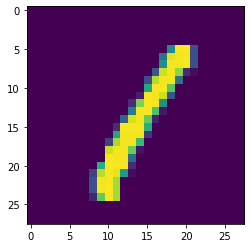

In [11]:
plt.imshow(x_train[3])

#Reshaping the data

,As we are using Deep learning neural network, the input for this network to get trained on should be of higher dimensional. Our dataset is having three-dimensional images so we have to reshape them too higher dimensions

In [12]:
#(batch,height,width,channel)
x_train=x_train.reshape(60000,28,28,1).astype('float32')
x_test=x_test.reshape(10000,28,28,1).astype('float32')

#Applying one hot encoding

One hot encoding to convert numerical values to classes where 0 to 9 are 10 seperate classes if value is 5 class 5 is 1 else 0

In [13]:
no_of_classes=10
y_train=np_utils.to_categorical(y_train,no_of_classes)
y_test=np_utils.to_categorical(y_test,no_of_classes)

In [14]:
y_test[3]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

#Creating the model

In [15]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

model.add(Flatten())
model.add(Dense(no_of_classes,activation='softmax'))

#Compile the model

In [16]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

#Train the model

In [17]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 204s 109ms/step - loss: 0.2139 - accuracy: 0.9516 - val_loss: 0.0835 - val_accuracy: 0.9749
Epoch 2/5
1875/1875 [==============================] - 203s 108ms/step - loss: 0.0663 - accuracy: 0.9790 - val_loss: 0.0881 - val_accuracy: 0.9747
Epoch 3/5
1875/1875 [==============================] - 200s 107ms/step - loss: 0.0462 - accuracy: 0.9845 - val_loss: 0.0851 - val_accuracy: 0.9781
Epoch 4/5
1875/1875 [==============================] - 201s 107ms/step - loss: 0.0316 - accuracy: 0.9893 - val_loss: 0.0973 - val_accuracy: 0.9787
Epoch 5/5
1875/1875 [==============================] - 203s 108ms/step - loss: 0.0258 - accuracy: 0.9922 - val_loss: 0.1220 - val_accuracy: 0.9713


#metrics are noticed

In [18]:
metrics=model.evaluate(x_test,y_test,verbose=0)
print("metrics-score=>test loss & accuracy")
print(metrics)

metrics-score=>test loss & accuracy
[0.12195690721273422, 0.9713000059127808]


#Test the model

In [19]:
prediction=model.predict(x_test[:5])
print(prediction)

[[2.97132239e-08 4.86586208e-15 3.93171973e-07 1.10870664e-04
  7.80074096e-12 1.17170709e-11 4.58390408e-16 9.99888420e-01
  1.12671920e-10 2.95142485e-07]
 [9.91138560e-11 1.80795876e-13 1.00000000e+00 6.95974112e-10
  1.85854924e-16 1.67955900e-16 1.29220523e-10 4.47235516e-19
  6.94875546e-11 4.70615556e-20]
 [2.72560730e-08 9.99994516e-01 9.58900273e-07 2.33121630e-11
  4.00353777e-08 8.15968737e-10 3.28427202e-10 9.73345515e-10
  4.46766262e-06 6.28924746e-10]
 [9.99217153e-01 7.39104941e-15 7.21826066e-09 4.39047805e-14
  6.12349852e-13 4.70248569e-14 8.45904458e-10 5.99951539e-14
  2.97840613e-10 7.82848510e-04]
 [8.68418004e-10 3.88094934e-09 2.69388799e-11 2.58619681e-09
  9.99997616e-01 6.95306605e-13 1.01592181e-11 4.53357210e-08
  8.80714668e-11 2.33095602e-06]]


In [21]:
import numpy as np

In [22]:
print(np.argmax(prediction,axis=1))

[7 2 1 0 4]


In [23]:
print(y_test[:5])

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


#model saving

In [24]:
model.save('models/mnistcnn.h5')

#Test the saved model

inputs loaded from mnist

X_train:(60000, 28, 28, 1)
y_train:(60000, 10)
X_test:(10000, 28, 28, 1)
y_test:(10000, 10)


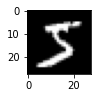

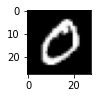

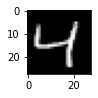

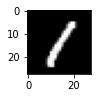

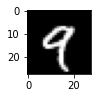

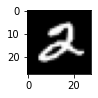

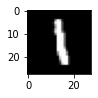

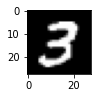

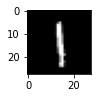

In [25]:

print('X_train:' +str(x_train.shape))
print('y_train:' +str(y_train.shape))
print('X_test:' +str(x_test.shape))
print('y_test:' +str(y_test.shape))
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330+1+i)
  pyplot.imshow(x_train[i],cmap=pyplot.get_cmap('gray'))
  pyplot.show()

ouput predicted from saved model

inputs as hown are 5,0,4,1,9,2,1,3,1

In [26]:
from tensorflow.keras.models import load_model
model=load_model('models/mnistcnn.h5')
from PIL import Image
for index in range(9):
  img=x_train[index].reshape((28,28))
  imgarray=np.array(img)
  imgarray=imgarray.reshape(1,28,28,1)
  y_pred=model.predict(imgarray)
  print(np.argmax(y_pred))

5
0
4
1
9
2
1
3
1


In [27]:
cd models


/home/wsuser/work/models


In [28]:
ls


mnistcnn.h5


#cloud deployment

In [41]:
!tar -zcvf handwritten-digit.tgz mnistcnn.h5


mnistcnn.h5


In [31]:
!pip install watson-machine-learning-client --upgrade

In [3]:
!pip install seaborn --upgrade ibm_watson_machine_learning


     |████████████████████████████████| 288 kB 8.7 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [32]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"KbH66OWNkaVSz-1U87yuda6eCjgfEKR5hAdl98LWcmu4"
}
client = APIClient(credentials)
client

In [33]:
client.spaces.get_details()

{'resources': [{'entity': {'description': '',
    'name': 'Space_name',
    'scope': {'bss_account_id': '37ed6829545d489db7c3739b2f89fd58'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '2a234799-fc8a-4ace-b874-c0325b7cc174',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': '205d25b7ff604b61bd736389862e8d1f',
        'api_key': 'dsC_LJO1C30RNH4RsbtyBUPyKXE1Ahh6K_UIbHSaZ_D6',
        'secret_access_key': '8e7db496875f7ab29d3a8a4135684e8410ef5894f95b32e3',
        'service_id': 'ServiceId-232e45f9-2f5e-40a8-be72-083e6445c150'},
       'editor': {'access_key_id': '6123bab4076b47af818e482ca3b1b716',
        'api_key': '4RdcY1y5qUURKaa-v-MxdfbtoaXMigEfDZt7z1kyK0ra',
        'resource_key_crn': 'crn:v1:bluemix:public:cloud-object-storage:global:a/37ed6829545d489db7c3739b2f89fd58:2c6c148b-e4ef-405b-892d-6978e2d7b800::',
        'secret_access_key': 'fbcff467c81af4c696981f0f0b9b88b0b8a92f

In [36]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [37]:
space_uid = guid_from_space_name(client,'Space_name')
print("Space UID = " + space_uid)

Space UID = 710a9137-3a02-4f23-940a-bd921ad5d755


In [38]:
client.set.default_space(space_uid)

'SUCCESS'

In [39]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [40]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [42]:
model_details = client.repository.store_model(model='handwritten-digit.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Digit recognition model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

model_id = client.repository.get_model_id(model_details)

In [43]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-22T14:56:01.372Z',
  'id': '811979ca-db62-41bf-8350-27f63dd16e7c',
  'modified_at': '2022-11-22T14:56:05.039Z',
  'name': 'CNN Digit recognition model',
  'owner': 'IBMid-66100402F6',
  'resource_key': '3ca74a2d-ac79-4454-9e4a-5f36412151ae',
  'space_id': '710a9137-3a02-4f23-940a-bd921ad5d755'},
 'system': {'warnings': []}}

In [44]:
model_id = client.repository.get_model_id(model_details)
model_id

'811979ca-db62-41bf-8350-27f63dd16e7c'

In [45]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecog_IBM_model.tar.gz'


'/home/wsuser/work/models/DigitRecog_IBM_model.tar.gz'

In [46]:
ls

DigitRecog_IBM_model.tar.gz                  handwritten-digit.tgz
handwritten-digit-recognition-model_new.tgz  mnistcnn.h5


#test the model

In [47]:
from tensorflow.keras.models import load_model
from keras.preprocessing import image
from PIL import Image
import numpy as np

In [49]:
model = load_model("mnistcnn.h5")

In [50]:
!pip install requests

In [51]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='lN45UE5bpuEMA2Y0Z5RoCbA6fY2aMrU3B2DL6mNW0TuN',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittenrecognition-donotdelete-pr-ckkr6kaam4x6cc'
object_key = 'image.png'

streaming_body_8 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [52]:
img = Image.open(streaming_body_8).convert("L") # convert image to monochrome
img = img.resize( (28,28) ) # resizing of input image

In [53]:
img

In [54]:
im2arr = np.array(img) #converting to image
im2arr = im2arr.reshape(1, 28, 28, 1) #reshaping according to our requirement

In [55]:
pred = model.predict(im2arr)
print(pred)

[[9.5247800e-05 1.8800121e-05 3.2635506e-02 8.1808525e-01 2.7552440e-07
  1.2808682e-01 3.7574534e-08 8.7691465e-04 2.0188825e-02 1.2268288e-05]]


In [56]:
print(np.argmax(pred, axis=1)) #printing our Labels

[3]
